In [1]:
# import packages
import os
import pandas as pd

In [2]:
# Path to the folder where the CSV files will be saved
csv_folder = './csv_folder'
invalid_rates = {}
council_name = {}

In [13]:
for filename in os.listdir(csv_folder):
    if filename.endswith("1994-1997.csv"):
        country_name = filename[:-14] 
        filepath = os.path.join(csv_folder, filename)
        #print(filepath)
        df = pd.read_csv(filepath, encoding='iso-8859-1')
        # replace empty strings with 'N/A' in the dataframe
        df = df.replace('N/A', 'N/A')
        num_invalid_rows = 0
        for index, row in df.iterrows():
            num_na = row.isna().sum()
            if num_na >= 5 and row['Council'] != 'Security Council':
                num_invalid_rows += 1
                
        invalid_rate = num_invalid_rows / len(df) 
        invalid_rates[country_name] = invalid_rate * 100
        df = df.fillna('N/A')
        df.to_csv(filepath, index=False)

total_num_files = len(invalid_rates)
total_invalid_rate = sum(invalid_rates.values()) / total_num_files

print("Invalid rates by file:")
for country_name, invalid_rate in invalid_rates.items():
    print(f"{country_name}: {invalid_rate:.2f}")
    
print(f"\nTotal invalid rate: {total_invalid_rate:.2f}")

Invalid rates by file:
Afghanistan: 0.00
Albania: 0.66
Azerbaijan: 1.04
Bahamas: 3.53
Bahrain: 1.54
Barbados: 3.45
Benin: 1.70
Bhutan: 0.00
Bosnia and Herzegovina: 1.31
Botswana: 0.00
Bulgaria: 1.27
Canada: 2.14
Central African Republic: 0.00
Chad: 2.22
Costa Rica: 2.01
Democratic Republic of the Congo: 0.00
Denmark: 1.30
Djibouti: 1.80
Dominican Republic: 4.28
Ecuador: 1.40
Equatorial Guinea: 3.12
Finland: 0.94
Gabon: 3.17
Gambia (Republic of The): 1.47
Georgia: 1.45
Germany: 0.84
Ghana: 1.44
Guinea: 1.56
Haiti: 1.30
Honduras: 0.36
Hungary: 1.03
Iceland: 0.66
Iran (Islamic Republic of): 2.11
Israel: 0.98
Jordan: 1.04
Kazakhstan: 2.02
Kenya: 0.66
Kuwait: 0.79
Luxembourg: 1.05
Madagascar: 2.72
Malawi: 1.11
Malaysia: 1.15
Maldives: 0.00
Mali: 2.78
Malta: 1.57
Marshall Islands: 1.33
Mauritania: 0.57
Morocco: 1.85
Mozambique: 0.96
Myanmar: 0.91
Namibia: 1.46
Nepal: 2.22
Netherlands: 1.43
Nigeria: 0.83
Niger: 2.15
Oman: 0.00
Panama: 1.75
Peru: 1.64
Philippines: 1.97
Poland: 2.03
Russian Fed

In [14]:
# Convert the dictionary to a DataFrame and sort by rate descendingly
df_rates = pd.DataFrame.from_dict(invalid_rates, orient="index", columns=["Invalid Rate"])
df_rates = df_rates.sort_values(by="Invalid Rate", ascending=False)
df_rates

,Invalid Rate
Vanuatu,4.444444
Dominican Republic,4.278075
Togo,4.273504
Bahamas,3.529412
Barbados,3.448276
...,...
Democratic Republic of the Congo,0.000000
Sri Lanka,0.000000
Seychelles,0.000000
Oman,0.000000


In [15]:
# Write the DataFrame to a CSV file
df_rates.to_csv('invalid_rate.csv')

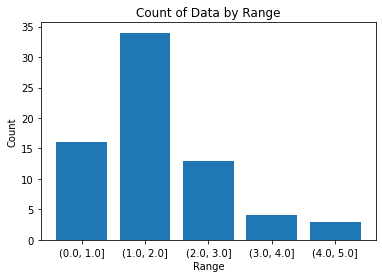

In [17]:
import matplotlib.pyplot as plt
# set the ranges for the graph
ranges = [0.0, 1, 2, 3, 4, 5]

# use pandas cut() function to categorize the data into the ranges
df_rates['range'] = pd.cut(df_rates['Invalid Rate'], ranges)

# group the data by range and count the number of occurrences
counts = df_rates.groupby('range')['Invalid Rate'].count()

# create the graph
plt.bar(counts.index.astype(str), counts.values)
plt.title('Count of Data by Range')
plt.xlabel('Range')
plt.ylabel('Count')
plt.show()

In [9]:
for filename in os.listdir(csv_folder):
    if filename.endswith("1994-1997.csv"):
        country_name = filename[:-14] 
        filepath = os.path.join(csv_folder, filename)
        df = pd.read_csv(filepath)
        # count each council name frequency in all files
        for index, row in df.iterrows():
            if row['Council'] in council_name:
                council_name[row['Council']] += 1
            else:
                council_name[row['Council']] = 1
        # convert council name dictionary to dataframe
        df_council = pd.DataFrame.from_dict(council_name, orient="index", columns=["Frequency"])
        
        # sort the dataframe by frequency descendingly
        df_council = df_council.sort_values(by="Frequency", ascending=False)

        # write the dataframe to a csv file
        df_council.to_csv('council_name.csv')
